<a href="https://colab.research.google.com/github/ggmtech/gkStockAnalysis/blob/master/Copy_of_1%2C3%2C6m_MomentumScreener_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy yfinance yahooquery pytesseract pillow datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.1
    Uninstalling lxml-5.3.1:
      Successfully uninstalled lxml-5.3.1


In [ ]:
#  !pip install yahooquery

In [ ]:
import yfinance as yf
import yahooquery as yq  # dir(yq) = 'Ticker', 'Screener',  'get_exchanges',  'get_market_summary',
#   'screener',  'ticker',  'search',  'research',
from yahooquery import Ticker  # as tk
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.table import Table
import time


In [ ]:
dir(yq)    # Lists many methods like  'Screener', 'Ticker', 'get_exchanges',  'screener', ...etc

['Research',
 'Screener',
 'Ticker',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'get_currencies',
 'get_exchanges',
 'get_market_summary',
 'get_trending',
 'headless',
 'misc',
 'name',
 'research',
 'screener',
 'search',
 'ticker',
 'utils']

In [ ]:
# config
symbols = 'fb aapl amzn nflx goog BHEL.NS'
y = Ticker(
    #['BHEL.NS'] ,
    symbols,
    asynchronous=True, # async request to yq
    backoff_factor=1,   # time delay in seconds after fail
    country='France',
    formatted=True,   #num data returned as dict like "totalCash": {"raw": 94051000320
                      # "fmt": "94.05B", "longFmt": "94,051,000,320" }
    progress=True, # progress bar
    #proxies=proxies, # proxies = {'http': 'http://10.10.1.10:3128','https': 'http://10.10.1.10:1080',}
    retry=10,
    status_forcelist=[404, 429, 500, 502, 503, 504], # retry when dl large data refused by yq
    timeout=3,
    #user_agent= "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36",
              # better a list of USER_AGENT_LIST =  [ listofuseragents ]
    validate=True, # then view invalid print(t.invalid_symbols) and valid as print(t.symbols)
    #username='fake_username', # for subscribers only
    #password='fake_password'
    # see https://github.com/dpguthrie/yahooquery/blob/master/yahooquery/ticker.py
)

pd.set_option('display.float_format', '{:.2f}'.format)

y.all_financial_data()   # prints the table


100%|██████████| 5/5 [00:00<00:00,  9.28it/s]


,asOfDate,periodType,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,AmortizationCashFlow,AmortizationOfIntangibles,...,TotalTaxPayable,TotalUnusualItems,TotalUnusualItemsExcludingGoodwill,TradeandOtherPayablesNonCurrent,TradingSecurities,TreasurySharesNumber,TreasuryStock,WorkInProcess,WorkingCapital,WriteOff
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,2020-09-30,12M,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAPL,2021-09-30,12M,USD,54763000000.00,26278000000.00,-70283000000.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,24689000000.00,NaN,NaN,NaN,NaN,9355000000.00,NaN
AAPL,2022-09-30,12M,USD,64115000000.00,28184000000.00,-72340000000.00,NaN,NaN,NaN,NaN,...,6552000000.00,NaN,NaN,16657000000.00,NaN,NaN,NaN,NaN,-18577000000.00,NaN
AAPL,2023-09-30,12M,USD,62611000000.00,29508000000.00,-70884000000.00,NaN,NaN,NaN,NaN,...,8819000000.00,NaN,NaN,15457000000.00,NaN,0.00,NaN,NaN,-1742000000.00,NaN
AAPL,2024-09-30,12M,USD,68960000000.00,33410000000.00,-73448000000.00,NaN,NaN,NaN,NaN,...,26601000000.00,NaN,NaN,9254000000.00,NaN,NaN,NaN,NaN,-23405000000.00,NaN
AMZN,2020-12-31,12M,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN,2021-12-31,12M,USD,78664000000.00,32891000000.00,-78519000000.00,55437000000.00,-1100000000.00,NaN,NaN,...,NaN,14652000000.00,14652000000.00,NaN,NaN,460000000.00,1837000000.00,NaN,19314000000.00,NaN
AMZN,2022-12-31,12M,USD,79600000000.00,42360000000.00,-97015000000.00,75066000000.00,-1400000000.00,NaN,NaN,...,NaN,-16266000000.00,-16266000000.00,NaN,NaN,515000000.00,7837000000.00,NaN,-8602000000.00,NaN
AMZN,2023-12-31,12M,USD,84981000000.00,52253000000.00,-120111000000.00,99025000000.00,-1700000000.00,NaN,NaN,...,NaN,1115000000.00,1115000000.00,NaN,NaN,515000000.00,7837000000.00,NaN,7434000000.00,NaN


In [ ]:
y.MODULES # large methos like 'assetProfile', 'balanceSheetHistory', 'balanceSheetHistoryQuarterly',
 # 'calendarEvents', 'cashflowStatementHistory',...... etc

['assetProfile',
 'balanceSheetHistory',
 'balanceSheetHistoryQuarterly',
 'calendarEvents',
 'cashflowStatementHistory',
 'cashflowStatementHistoryQuarterly',
 'defaultKeyStatistics',
 'earnings',
 'earningsHistory',
 'earningsTrend',
 'esgScores',
 'financialData',
 'fundOwnership',
 'fundPerformance',
 'fundProfile',
 'indexTrend',
 'incomeStatementHistory',
 'incomeStatementHistoryQuarterly',
 'industryTrend',
 'insiderHolders',
 'insiderTransactions',
 'institutionOwnership',
 'majorHoldersBreakdown',
 'pageViews',
 'price',
 'quoteType',
 'recommendationTrend',
 'secFilings',
 'netSharePurchaseActivity',
 'sectorTrend',
 'summaryDetail',
 'summaryProfile',
 'topHoldings',
 'upgradeDowngradeHistory']

In [ ]:
y.asset_profile

100%|██████████| 5/5 [00:00<00:00, 89.04it/s]


{'NFLX': {'address1': '121 Albright Way',
  'city': 'Los Gatos',
  'state': 'CA',
  'zip': '95032',
  'country': 'United States',
  'phone': '(408) 540-3700',
  'website': 'https://www.netflix.com',
  'industry': 'Entertainment',
  'industryKey': 'entertainment',
  'industryDisp': 'Divertissement',
  'sector': 'Communication Services',
  'sectorKey': 'communication-services',
  'sectorDisp': 'Services de communication',
  'longBusinessSummary': 'Netflix, Inc. provides entertainment services. The company offers television (TV) series, documentaries, feature films, and games across various genres and languages. It also provides members the ability to receive streaming content through a host of internet-connected devices, including TVs, digital video players, TV set-top boxes, and mobile devices. The company operates approximately in 190 countries. Netflix, Inc. was incorporated in 1997 and is headquartered in Los Gatos, California.',
  'fullTimeEmployees': 14000,
  'companyOfficers': [{'

In [ ]:
y.balance_sheet('q')

100%|██████████| 5/5 [00:00<00:00,  8.72it/s]


,asOfDate,periodType,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,AvailableForSaleSecurities,BuildingsAndImprovements,...,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TotalTaxPayable,TradeandOtherPayablesNonCurrent,TradingSecurities,TreasurySharesNumber,TreasuryStock,WorkInProcess,WorkingCapital
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,2023-09-30,3M,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8819000000.00,15457000000.00,NaN,0.00,NaN,NaN,NaN
AAPL,2023-12-31,3M,USD,58146000000.00,23194000000.00,-72510000000.00,NaN,NaN,99475000000.00,NaN,...,279414000000.00,209822000000.00,145441000000.00,NaN,NaN,NaN,0.00,NaN,NaN,9719000000.00
AAPL,2024-03-31,3M,USD,45753000000.00,21837000000.00,-71697000000.00,NaN,NaN,95187000000.00,NaN,...,263217000000.00,208995000000.00,139395000000.00,NaN,NaN,NaN,NaN,NaN,NaN,4594000000.00
AAPL,2024-06-30,3M,USD,47574000000.00,22795000000.00,-72627000000.00,NaN,NaN,91240000000.00,NaN,...,264904000000.00,206177000000.00,133280000000.00,NaN,NaN,NaN,NaN,NaN,NaN,-6189000000.00
AAPL,2024-09-30,3M,USD,68960000000.00,33410000000.00,-73448000000.00,NaN,NaN,91479000000.00,NaN,...,308030000000.00,211993000000.00,131638000000.00,26601000000.00,9254000000.00,NaN,NaN,NaN,NaN,-23405000000.00
AAPL,2024-12-31,3M,USD,61910000000.00,29639000000.00,-74546000000.00,NaN,NaN,87593000000.00,NaN,...,277327000000.00,210845000000.00,132962000000.00,NaN,NaN,NaN,NaN,NaN,NaN,-11125000000.00
AMZN,2023-09-30,3M,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN,2023-12-31,3M,USD,84981000000.00,52253000000.00,-120111000000.00,99025000000.00,-1700000000.00,NaN,NaN,...,325979000000.00,355503000000.00,161062000000.00,NaN,NaN,NaN,515000000.00,7837000000.00,NaN,7434000000.00
AMZN,2024-03-31,3M,USD,73068000000.00,47768000000.00,NaN,103938000000.00,-1700000000.00,NaN,NaN,...,314308000000.00,366980000000.00,161343000000.00,NaN,NaN,NaN,515000000.00,7837000000.00,NaN,11024000000.00


In [ ]:
#retrive pre defined screeners
from yahooquery import Screener
s = Screener()
s.available_screeners    # List large number of methods like analyst_strong_buy_stocks',
    # 'apparel_manufacturing',  'apparel_retail',  'asset_management', 'auto_manufacturers',


['advertising_agencies',
 'aerospace_defense',
 'aggressive_small_caps',
 'agricultural_inputs',
 'airlines',
 'airports_air_services',
 'all_cryptocurrencies_au',
 'all_cryptocurrencies_ca',
 'all_cryptocurrencies_eu',
 'all_cryptocurrencies_gb',
 'all_cryptocurrencies_in',
 'all_cryptocurrencies_us',
 'aluminum',
 'analyst_strong_buy_stocks',
 'apparel_manufacturing',
 'apparel_retail',
 'asset_management',
 'auto_manufacturers',
 'auto_parts',
 'auto_truck_dealerships',
 'banks_diversified',
 'banks_regional',
 'bearish_stocks_right_now',
 'best_hist_performance_etfs',
 'best_hist_performance_etfs_asia',
 'best_hist_performance_etfs_europe',
 'best_hist_performance_mutual_funds',
 'best_hist_performance_mutual_funds_asia',
 'best_hist_performance_mutual_funds_europe',
 'beverages_brewers',
 'beverages_non_alcoholic',
 'beverages_wineries_distilleries',
 'biotechnology',
 'bond_etfs',
 'bond_mutual_funds',
 'bond_mutual_funds_asia',
 'bond_mutual_funds_europe',
 'broadcasting',
 'bui

In [ ]:
s = Screener()
s.get_screeners(['most_actives', 'day_gainers'], 5)    # large data key values

{'most_actives': {'id': '437465ef-980e-4d8c-a860-de7cbfbab373',
  'title': 'Most Actives',
  'description': 'Discover the most traded equities in the trading day.',
  'canonicalName': 'MOST_ACTIVES',
  'criteriaMeta': {'size': 5,
   'offset': 0,
   'sortField': 'dayvolume',
   'sortType': 'DESC',
   'quoteType': 'EQUITY',
   'includeFields': ['change_in_number_of_institutional_holders',
    'trading_central_last_close_price_to_fair_value',
    'intradaypricechange',
    'estimated_revenue_growth',
    'intradaymarketcap',
    'morningstar_previous_rating',
    'fiftytwowkhigh',
    'pctheldinst',
    'morningstar_last_close_price_to_fair_value',
    'shares_bought_by_funds',
    'ror_percent',
    'morningstar_rating',
    'sector',
    'peratio.lasttwelvemonths',
    'bullish_proportion',
    'percent_change_in_number_of_institutional_holders',
    'number_of_institutional_sellers',
    'morningstar_stewardship',
    'lastclosetevebit.lasttwelvemonths',
    'percentchange',
    'morni

In [ ]:
# only subscribers
from yahooquery import Research
r = Research(username='username@yahoo.com', password='password')
r.reports(
    report_type='Analyst Report, Insider Activity',
    report_date='Last Week'
)

In [ ]:
#import yahooquery as yq
# data = yq.get_currencies() # currencies database
# df = yq.get_exchanges()      # list of Exchanges and delays
# mktsummary = yq.get_market_summary(country='hong kong')
# data = yq.get_trending()   # get trending securites
data = yq.search("38141G104", first_quote=True)  # Description: Query Yahoo Finance for anything: companies, ticker symbols, cusips, news, etc.


In [ ]:
data

{'exchange': 'NYQ',
 'shortname': 'Goldman Sachs Group, Inc. (The)',
 'quoteType': 'EQUITY',
 'symbol': 'GS',
 'index': 'quotes',
 'score': 20703.0,
 'typeDisp': 'Equity',
 'longname': 'The Goldman Sachs Group, Inc.',
 'exchDisp': 'NYSE',
 'sector': 'Financial Services',
 'sectorDisp': 'Financial Services',
 'industry': 'Capital Markets',
 'industryDisp': 'Capital Markets',
 'isYahooFinance': True}

In [ ]:
# Compare downloads for all companies within the S&P500 yfinance and yahooquery
import os
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

from yahooquery import Ticker
import yfinance as yf


InteractiveShell.ast_node_interactivity = "all"

pd.options.display.float_format = '{:,}'.format
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 100)

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp500 = tables[0]['Symbol'].tolist()
sp500 = [symbol.replace(".", "-") for symbol in sp500]
sp500

symbol = 'aapl'

YF_aapl = yf.Ticker('aapl')
YQ_aapl = Ticker('aapl')     # direct Ticker when imported as Ticker above , no yq. prefix?

In [ ]:
%%time
attrs = ['cashflow', 'balance_sheet', 'financials']
yf_d = {}
for attr in attrs:
    df = getattr(YF_aapl, attr)
    yf_d[attr] = df.shape[0]

CPU times: user 2.79 ms, sys: 471 µs, total: 3.26 ms
Wall time: 3.23 ms


In [ ]:
# time for yahooquery
%%time
methods = ['cash_flow', 'balance_sheet', 'income_statement']
yq_d = {}
for method in methods:
    df = getattr(YQ_aapl, method)()
    df.set_index(['asOfDate', 'periodType'], inplace=True)
    df = df.T
    yq_d[method] = df.shape[0]

CPU times: user 315 ms, sys: 0 ns, total: 315 ms
Wall time: 336 ms


In [ ]:
# Comparison of items returned for each
cash_flow = yf_d.pop('cashflow')
income_statement = yf_d.pop('financials')
yf_d.update({'cash_flow': cash_flow, 'income_statement': income_statement})
pd.DataFrame({'yahooquery': yq_d, 'yfinance': yf_d})

,yahooquery,yfinance
cash_flow,56,53
balance_sheet,69,68
income_statement,40,39


from matplotlib import pyplot as plt
_df_0['yahooquery'].plot(kind='hist', bins=20, title='yahooquery')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['yfinance'].plot(kind='hist', bins=20, title='yfinance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='yahooquery', y='yfinance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['yahooquery'].plot(kind='line', figsize=(8, 4), title='yahooquery')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['yfinance'].plot(kind='line', figsize=(8, 4), title='yfinance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Compare downloads for all companies within the S&P500
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp500 = tables[0]['Symbol'].tolist()
sp500 = [symbol.replace(".", "-") for symbol in sp500]

In [ ]:
%%time
yf_data = yf.download(sp500, period='ytd', interval='1d', group_by='ticker')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed


CPU times: user 11.9 s, sys: 906 ms, total: 12.8 s
Wall time: 42.9 s


In [ ]:
type(yf_data)
yf_data.shape
yf_data.head()

pandas.core.frame.DataFrame

(61, 2515)

Ticker                   NRG                                      \
Price                   Open              High               Low   
Date                                                               
2025-01-02 90.61909924764336 92.66028960338339 89.99180033914946   
2025-01-03 93.52655634947469 100.2276532955983 93.04861468159083   
2025-01-06 98.87349298735562 99.88910857482732 97.56911449000103   
2025-01-07 98.57477599055731 99.04275846577043 94.43264034295802   
2025-01-08 96.12534300987976 99.18215646447483 92.94904224362185   

Ticker                                              AMP                    \
Price                  Close   Volume              Open              High   
Date                                                                        
2025-01-02 92.35162353515625  2182400  534.028477639581 535.0655978687519   
2025-01-03  98.0769271850586  2701200 531.2760965843006  534.676760475529   
2025-01-06 98.29598236083984  4259200 534.2578426338587 538.1271856119882   
2025-01-07 96.31452941894531  3110700 531.7048709677721 533.4002116661541   
2025-01-08 98.11675262451172  3407500  528.025046640131  533.529897962106   

Ticker                                                                PWR  \
Price                    Low             Close  Volume               Open   
Date                                                                        
2025-01-02 524.7141166260632 528.5037231445312  511400  318.5400085449219   
2025-01-03 525.3325127709719 534.3676147460938  275000 318.20001220703125   
2025-01-06 528.6932197968828 529.3513793945312  359600  330.6199951171875   
2025-01-07 520.4359347110769 527.3768310546875  372800 328.57000732421875   
2025-01-08 526.2798553851147 533.4600830078125  568400 317.57000732421875   

Ticker                                                                        \
Price                    High                Low              Close   Volume   
Date                                                                           
2025-01-02 320.55999755859375 312.07000732421875              315.5  1054500   
2025-01-03  327.2099914550781  317.1000061035156  326.5199890136719   693200   
2025-01-06  332.8299865722656  327.7799987792969 328.05999755859375   863500   
2025-01-07  331.2200012207031  316.3800048828125 319.80999755859375   911900   
2025-01-08 319.55999755859375 307.55999755859375 312.20001220703125  1165800   

Ticker                    PPL                                        \
Price                    Open               High                Low   
Date                                                                  
2025-01-02  32.31894220539643   32.4181394038038 31.822948645098496   
2025-01-03  32.00150302793488 32.239581603253285 31.892387622716637   
2025-01-06 31.902304721697213 31.981665505425752  31.40631117578517   
2025-01-07  31.62454820828566   31.8824650837214 31.565029511512876   
2025-01-08 31.644388731639484  31.92214580622545 31.356713450876587   

Ticker                                               UNH                    \
Price                   Close   Volume              Open              High   
Date                                                                         
2025-01-02  31.92214584350586  2820000 505.8382062093238 509.9307015199163   
2025-01-03  32.01142501831055  3134700 504.1952603680879 514.0929332658372   
2025-01-06 31.475749969482422  3867000 510.8169380139114 518.0858608442101   
2025-01-07 31.743587493896484  3498200  516.642046223089 517.2893045042462   
2025-01-08  31.91222381591797  3624700 512.3105837786965 522.4372890881649   

Ticker                                                                   JNJ  \
Price                     Low              Close   Volume               Open   
Date                                                                           
2025-01-02   501.148258120942  502.3630676269531  4234900  144.0767103107676   
2025-01-03 503.22938693640117 510.81695556640625  3019500 142.9259

In [ ]:
# now for yahooquery
%%time
tickers = Ticker(sp500, asynchronous=True)
yq_data = tickers.history(period='ytd', interval='1d')

NameError: name 'sp500' is not defined

In [ ]:
type(yq_data)
yq_data.shape
yq_data.head()

NameError: name 'yq_data' is not defined

In [ ]:
# option chains in yf

%%time
dataframes = []
for option in YF_aapl.options:
    options = YF_aapl.option_chain(option)
    calls = options[0]
    calls['optionType'] = 'calls'
    puts = options[1]
    puts['optionType'] = 'puts'
    dataframes.append(pd.concat([calls, puts]))
yf_option_chain = pd.concat(dataframes)


CPU times: user 186 ms, sys: 3.97 ms, total: 190 ms
Wall time: 1.4 s


In [ ]:
yf_option_chain

NameError: name 'yf_option_chain' is not defined

In [ ]:
# option with yq
%%time
yq_option_chain = YQ_aapl.option_chain

CPU times: user 65.9 ms, sys: 1.6 ms, total: 67.5 ms
Wall time: 377 ms


In [ ]:
yq_option_chain

contractSymbol  strike currency  lastPrice  \
symbol expiration optionType                                                    
aapl   2025-04-04 calls       AAPL250404C00100000   100.0      USD      123.1   
                  calls       AAPL250404C00110000   110.0      USD     103.06   
                  calls       AAPL250404C00120000   120.0      USD       94.8   
                  calls       AAPL250404C00130000   130.0      USD       94.5   
                  calls       AAPL250404C00140000   140.0      USD      80.56   
...                                           ...     ...      ...        ...   
       2027-12-17 puts        AAPL271217P00270000   270.0      USD       56.4   
                  puts        AAPL271217P00275000   275.0      USD      66.79   
                  puts        AAPL271217P00280000   280.0      USD      72.46   
                  puts        AAPL271217P00290000   290.0      USD       80.5   
                  puts        AAPL271217P00320000   320.0      USD     107.42   

                              change  percentChange  volume  openInterest  \
symbol expiration optionType                                                
aapl   2025-04-04 calls          0.0            0.0     1.0             0   
                  calls          0.0            0.0     2.0             0   
                  calls          0.0            0.0     1.0             0   
                  calls          0.0            0.0     1.0             0   
                  calls          0.0            0.0     2.0             0   
...                              ...            ...     ...           ...   
       2027-12-17 puts           0.0            0.0     1.0             0   
                  puts           0.0            0.0     0.0             0   
                  puts           0.0            0.0     1.0             0   
                  puts           0.0            0.0     0.0             0   
                  puts           0.0            0.0     0.0             0   

                              bid  ask contractSize       lastTradeDate  \
symbol expiration optionType                                              
aapl   2025-04-04 calls       0.0  0.0      REGULAR 2025-04-01 19:53:42   
                  calls       0.0  0.0      REGULAR 2025-03-21 16:02:33   
                  calls       0.0  0.0      REGULAR 2025-03-19 17:17:34   
                  calls       0.0  0.0      REGULAR 2025-03-27 19:55:00   
                  calls       0.0  0.0      REGULAR 2025-03-31 18:26:16   
...                           ...  ...          ...                 ...   
       2027-12-17 puts        0.0  0.0      REGULAR 2025-03-25 13:37:17   
                  puts        0.0  0.0      REGULAR 2025-03-14 15:46:46   
                  puts        0.0  0.0      REGULAR 2025-03-17 15:46:56   
                  puts        0.0  0.0      REGULAR 2025-03-14 14:05:57   
                  puts        0.0  0.0      REGULAR 2025-03-18 18:52:40   

                                  impliedVolatility  inTheMoney  
symbol expiration optionType                                     
aapl   2025-04-04 calls      1.0000000000000003e-05        True  
                  calls      1.0000000000000003e-05        True  
                  calls      1.0000000000000003e-05        True  
                  calls      1.0000000000000003e-05        True  
                  calls      1.0000000000000003e-05        True  
...                                             ...         ...  
       2027-12-17 puts       1.0000000000000003e-05        True  
                  puts       1.0000000000000003e-05        True  
                  puts       1.0000000000000003e-05        True  
                  puts       1.0000000000000003e-05        True  
                  puts       1.0000000000000003e-05        True  

[2048 rows x 14 columns]

In [ ]:
symbols = 'FB AAPL AMZN NFLX GOOG'
attrs = [
    'info', 'financials', 'quarterly_financials', 'major_holders',
    'institutional_holders', 'balance_sheet', 'quarterly_balance_sheet',
    'cashflow', 'quarterly_cashflow',  'quarterly_earnings',
    'sustainability', 'recommendations', 'calendar'
]    # 'earnings', depricated


In [ ]:
# multiple symboles access in yq
%%time
yf_d = {}
tickers = yf.Tickers(symbols)
for symbol in symbols.split(" "):
    #ticker = getattr(tickers.tickers, symbol) error
    ticker = tickers.tickers[symbol]  # <-- Get ticker data using the symbol as a key
    yf_d[symbol] = {}
    for attr in attrs:
        yf_d[symbol][attr] = getattr(ticker, attr)

yf_d.keys()
yf_d['FB'].keys()

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FB?modules=institutionOwnership%2CfundOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CinsiderTransactions%2CinsiderHolders%2CnetSharePurchaseActivity&corsDomain=finance.yahoo.com&formatted=false&crumb=M3zknQuFlHl
/usr/local/lib/python3.11/dist-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FB?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FB&crumb=M3zknQuFlHl
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FB?module

CPU times: user 1.32 s, sys: 43.1 ms, total: 1.37 s
Wall time: 4.35 s


dict_keys(['info', 'financials', 'quarterly_financials', 'major_holders', 'institutional_holders', 'balance_sheet', 'quarterly_balance_sheet', 'cashflow', 'quarterly_cashflow', 'quarterly_earnings', 'sustainability', 'recommendations', 'calendar'])

In [ ]:
# with yq
%%time
tickers = Ticker(symbols, asynchronous=True)
data = tickers.all_modules

CPU times: user 150 ms, sys: 11.6 ms, total: 161 ms
Wall time: 800 ms


In [ ]:
data['FB'].keys()

dict_keys(['quoteType', 'price'])

In [ ]:
# List of tickers
tickers200 = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS", "SBIN.NS", "INFY.NS",
           "LICI.NS", "HINDUNILVR.NS", "ITC.NS", "LT.NS", "BAJFINANCE.NS", "MARUTI.NS", "HCLTECH.NS",
           "ADANIENT.NS", "AXISBANK.NS", "SUNPHARMA.NS", "TATAMOTORS.NS", "TATAMTRDVR.NS", "M&M.NS",
           "NTPC.NS", "KOTAKBANK.NS", "ONGC.NS", "HAL.NS", "DMART.NS", "TITAN.NS", "ULTRACEMCO.NS",
           "ADANIPORTS.NS", "ADANIPOWER.NS", "ADANIGREEN.NS", "COALINDIA.NS", "POWERGRID.NS", "ASIANPAINT.NS",
           "BAJAJ-AUTO.NS", "WIPRO.NS", "BAJAJFINSV.NS", "SIEMENS.NS", "NESTLEIND.NS", "IOC.NS", "IRFC.NS",
           "JIOFIN.NS", "TATASTEEL.NS", "JSWSTEEL.NS", "DLF.NS", "BEL.NS", "VBL.NS", "TRENT.NS", "VEDL.NS",
           "ABB.NS", "INDIGO.NS", "ZOMATO.NS", "GRASIM.NS", "PFC.NS", "PIDILITIND.NS", "AMBUJACEM.NS",
           "HINDALCO.NS", "LTIM.NS", "GODREJCP.NS", "SBILIFE.NS", "LODHA.NS", "TATAPOWER.NS", "BANKBARODA.NS",
           "GAIL.NS", "PNB.NS", "TECHM.NS", "BRITANNIA.NS", "RECLTD.NS", "EICHERMOT.NS", "BPCL.NS",
           "HDFCLIFE.NS", "CIPLA.NS", "DIVISLAB.NS", "HAVELLS.NS", "INDUSINDBK.NS", "TVSMOTOR.NS",
           "ADANIENSOL.NS", "CHOLAFIN.NS", "UNIONBANK.NS", "HEROMOTOCO.NS", "JSWENERGY.NS", "DABUR.NS",
           "TATACONSUM.NS", "CANBK.NS", "ATGL.NS", "ZYDUSLIFE.NS", "MOTHERSON.NS", "IDEA.NS", "JINDALSTEL.NS",
           "NHPC.NS", "POLYCAB.NS", "CGPOWER.NS", "DRREDDY.NS", "CUMMINSIND.NS", "BHEL.NS", "TORNTPHARM.NS",
           "SHREECEM.NS", "SHRIRAMFIN.NS", "INDUSTOWER.NS", "BAJAJHLDNG.NS", "IDBI.NS", "BOSCHLTD.NS",
           "APOLLOHOSP.NS", "MANKIND.NS", "MARICO.NS", "INDHOTEL.NS", "ICICIPRULI.NS", "HDFCAMC.NS",
           "ICICIGI.NS", "COLPAL.NS", "NAUKRI.NS", "MAXHEALTH.NS", "GODREJPROP.NS", "IRCTC.NS", "RVNL.NS",
           "TIINDIA.NS", "NMDC.NS", "LUPIN.NS", "HINDPETRO.NS", "AUROPHARMA.NS", "BHARATFORG.NS",
           "SUPREMEIND.NS", "OFSS.NS", "YESBANK.NS", "INDIANB.NS", "TORNTPOWER.NS", "PRESTIGE.NS",
           "OBEROIRLTY.NS", "SRF.NS", "SBICARD.NS", "ASHOKLEY.NS", "SUZLON.NS", "OIL.NS", "CONCOR.NS",
           "MAZDOCK.NS", "SAIL.NS", "BALKRISIND.NS", "ABCAPITAL.NS", "DIXON.NS", "PERSISTENT.NS", "ALKEM.NS",
           "JSWINFRA.NS", "POLICYBZR.NS", "ASTRAL.NS", "BERGEPAINT.NS", "PIIND.NS", "BANKINDIA.NS",
           "IDFCFIRSTB.NS", "MRF.NS", "BDL.NS", "SJVN.NS", "GMRINFRA.NS", "TATACOMM.NS", "PATANJALI.NS",
           "LTTS.NS", "AUBANK.NS", "NYKAA.NS", "VOLTAS.NS", "MAHABANK.NS", "ACC.NS", "MPHASIS.NS", "FACT.NS",
           "PETRONET.NS", "APLAPOLLO.NS", "TATAELXSI.NS", "ESCORTS.NS", "TATATECH.NS", "PAGEIND.NS",
           "KALYANKJIL.NS", "LTF.NS", "KPITTECH.NS", "UPL.NS", "GUJGASLTD.NS", "BIOCON.NS", "FEDERALBNK.NS",
           "SONACOMS.NS", "LICHSGFIN.NS", "BSE.NS", "COFORGE.NS", "POONAWALLA.NS", "FORTIS.NS", "M&MFIN.NS",
           "JUBLFOOD.NS", "DALBHARAT.NS", "ABFRL.NS", "IGL.NS", "MFSL.NS", "BANDHANBNK.NS", "DEEPAKNTR.NS",
           "APOLLOTYRE.NS", "GLAND.NS", "IPCALAB.NS", "DELHIVERY.NS", "SUNTV.NS", "SYNGENE.NS", "TATACHEM.NS",
           "PAYTM.NS", "LAURUSLABS.NS", "LALPATHLAB.NS", "PEL.NS", "ZEEL.NS","UNITDSPR.NS"]

# mystocklist
tickers = ['KPITTECH.NS', 'METROBRAND.NS', 'PERSISTENT.NS', 'ANGELONE.NS', 'RAINBOW.NS',
'MASFIN.NS', 'Bajfinance.ns', 'EIDPARRY.NS', 'SAFARI.NS', 'IDFCFIRSTB.NS', 'ZOMATO.NS',
'SONACOMS.NS', 'CHOLAFIN.NS', 'SULA>NS', 'FEDERALBNK.NS', 'CMSINFO.NS', 'HOMEFIRST.NS',
'TIPS.NS', 'KEI.NS', 'RAYMONDLSL.NS', 'AAVAS.NS', 'MEDANTA.NS', 'APTUS.NS', 'SHRIRAMFIN.NS',
'POLYMED.NS', 'NH.NS', 'BLS.NS', 'BIKAJI.NS', 'KIRLOSENG.NS', 'MANKIND.NS', 'BSOFT.NS',
'PNGJL.NS', 'JINDALSTEL.NS', 'REDTAPE.NS', 'Dabur.NS', 'ARVINDFASN.NS',
'METROPOLIS.NS', 'FEDFINA.NS', 'Nykaa.NS', 'SJS.NS', 'Cyient.NS', 'AADHARHFC.NS',
'Nazara.NS', 'DEEPINDS.NS', 'THOMASCOOK.NS', 'BAJAJHFL.NS', 'NAUKRI.NS', 'TI.NS',
'DMART.NS', 'VIJAYA.NS', 'Deltacorp.NS', 'VBL.NS', 'PROTEAN.NS', 'CAMS.NS', 'Fusion.NS',
'Prudent.NS', 'INDIASHLTR.NS', 'Emudhra.NS', 'PGEL.NS', 'KOTAKBANK.NS', 'STARHEALTH.NS',
'NLCINDIA.NS', 'RAYMOND.NS', 'ARVIND.NS', 'MEDIASSIST.NS', 'BATAINDIA.NS', 'polycab.NS',
'KPRMILL.NS', 'HEROMOTOCO.NS', 'RELIANCE.NS', 'ARE&M.NS', 'HDFCBank.NS', 'KFINTECH.NS',
'TataMotors.NS', 'NTPC.NS', 'ONGC.NS', 'SJVN.NS', 'NHPC.NS', 'CENTURYPLY.NS', 'ABCAPITAL.NS',
'JIOFIN.NS', 'LALPATHLAB.NS', 'INDUSINDBK.NS', 'HCLTECH.NS', 'TATAELXSI.NS', 'LTIM.NS',
'IDEAFORGE.NS', 'HDFCAMC.NS', 'BAYERCROP.NS', 'JBMA.NS', 'OLECTRA.NS', 'DrReddy.NS',
'Plazacable.NS', 'ABFRL.NS', 'WAAREEENR.NS' ]



In [ ]:
len(tickers)

95

In [ ]:
# Set dates
end_date   = datetime.today()
start_date = end_date         - timedelta(days=365 * 2)   # 2 years of data for moving averages

rel = yq.Ticker('RELIANCE.NS', start_date = start_date, end_date = end_date)

In [ ]:
# set decimals
pd.set_option('display.float_format', '{:.2f}'.format)
rel.valuation_measures     #why no bkt?

,asOfDate,periodType,EnterpriseValue,EnterprisesValueEBITDARatio,EnterprisesValueRevenueRatio,ForwardPeRatio,MarketCap,PbRatio,PeRatio,PsRatio
symbol,,,,,,,,,,
RELIANCE.NS,2021-04-01,TTM,14664368831585.00,NaN,NaN,24.63,13671888831585.00,2.23,31.36,2.91
RELIANCE.NS,2021-04-05,TTM,NaN,21.12,3.24,NaN,NaN,NaN,NaN,NaN
RELIANCE.NS,2023-12-31,3M,18641503575903.00,11.25,2.15,NaN,17491333575903.00,2.33,25.61,1.99
RELIANCE.NS,2024-03-31,3M,21258487757601.00,17.22,2.42,NaN,20108317757601.00,2.68,28.78,2.26
RELIANCE.NS,2024-06-10,TTM,21099125606399.00,11.81,2.34,NaN,19911305606399.00,2.51,28.60,2.21
RELIANCE.NS,2024-06-30,3M,22333879797030.00,18.09,2.55,NaN,21183709797030.00,2.82,30.32,2.38
RELIANCE.NS,2024-07-12,TTM,22795434044758.00,12.76,2.53,NaN,21607614044758.00,2.72,31.03,2.40
RELIANCE.NS,2024-09-19,TTM,21236635252300.00,11.98,2.36,NaN,19888315252300.00,2.51,28.93,2.15
RELIANCE.NS,2024-09-30,3M,21330009212693.00,12.03,2.37,NaN,19981689212693.00,2.52,29.06,2.16


In [ ]:
rel.income_statement(frequency='q')

,asOfDate,periodType,currencyCode,BasicAverageShares,BasicEPS,CostOfRevenue,DilutedAverageShares,DilutedEPS,DilutedNIAvailtoComStockholders,EBIT,...,PretaxIncome,ReconciledCostOfRevenue,RestructuringAndMergernAcquisition,TaxEffectOfUnusualItems,TaxProvision,TaxRateForCalcs,TotalExpenses,TotalRevenue,TotalUnusualItems,TotalUnusualItemsExcludingGoodwill
symbol,,,,,,,,,,,,,,,,,,,,,
RELIANCE.NS,2020-06-30,TTM,INR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-5220000000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELIANCE.NS,2023-09-30,3M,INR,13530921820.00,12.86,NaN,13530921820.00,12.86,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELIANCE.NS,2023-09-30,TTM,INR,6765695752.00,101.24,NaN,6765695752.00,101.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELIANCE.NS,2023-12-31,3M,INR,13530564263.00,12.76,1604050000000.00,13530564263.00,12.76,172650000000.00,316220000000.00,...,258330000000.00,1604050000000.00,NaN,0.00,63450000000.00,0.25,1973330000000.00,2250860000000.00,NaN,NaN
RELIANCE.NS,2023-12-31,TTM,INR,6765540870.00,103.42,NaN,6765540870.00,103.42,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELIANCE.NS,2024-03-31,3M,INR,NaN,NaN,2054570000000.00,NaN,NaN,189510000000.00,322350000000.00,...,278200000000.00,2054570000000.00,NaN,0.00,65770000000.00,0.24,2073210000000.00,2365330000000.00,NaN,NaN
RELIANCE.NS,2024-03-31,TTM,INR,6765889213.00,102.90,NaN,6765889213.00,102.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELIANCE.NS,2024-06-30,3M,INR,13534197586.00,11.19,1670540000000.00,13534197586.00,11.19,151380000000.00,291520000000.00,...,232340000000.00,1670540000000.00,NaN,0.00,57860000000.00,0.25,2066150000000.00,2317840000000.00,NaN,NaN
RELIANCE.NS,2024-06-30,TTM,INR,6765806140.00,101.61,NaN,6766236010.00,101.61,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Function to fetch historical price data
#ticker = 'RELIENCE.NS'
#end_date   = datetime.today()
#start_date = end_date         - timedelta(days=365 * 2)   # 2 years of data for moving averages

def get_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)

# Set dates
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 2)  # 2 years of data for moving averages


data = {}               # Empty Data dictionary to hold stock data

for ticker in tickers:  # Fetch data for all tickers
    try:
        stock_data = get_data(ticker, start_date, end_date)
        if len(stock_data) > 0:
            data[ticker] = stock_data
            print(f"Fetched data for {ticker}")
            print(f"Now waiting time gap of 1 second after {ticker}")
            time.sleep(1)  # Wait for 1 second after each fetch

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Fetched data for KPITTECH.NS
Now waiting time gap of 1 second after KPITTECH.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for METROBRAND.NS
Now waiting time gap of 1 second after METROBRAND.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for PERSISTENT.NS
Now waiting time gap of 1 second after PERSISTENT.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ANGELONE.NS
Now waiting time gap of 1 second after ANGELONE.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for RAINBOW.NS
Now waiting time gap of 1 second after RAINBOW.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for MASFIN.NS
Now waiting time gap of 1 second after MASFIN.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Bajfinance.ns
Now waiting time gap of 1 second after Bajfinance.ns


[*********************100%***********************]  1 of 1 completed


Fetched data for EIDPARRY.NS
Now waiting time gap of 1 second after EIDPARRY.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for SAFARI.NS
Now waiting time gap of 1 second after SAFARI.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for IDFCFIRSTB.NS
Now waiting time gap of 1 second after IDFCFIRSTB.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ZOMATO.NS
Now waiting time gap of 1 second after ZOMATO.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for SONACOMS.NS
Now waiting time gap of 1 second after SONACOMS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for CHOLAFIN.NS
Now waiting time gap of 1 second after CHOLAFIN.NS


ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SULA%3ENS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SULA%3ENS&crumb=OoQsJcp4knx
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SULA>NS']: AttributeError("'NoneType' object has no attribute 'update'")
[*********************100%***********************]  1 of 1 completed


Fetched data for FEDERALBNK.NS
Now waiting time gap of 1 second after FEDERALBNK.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for CMSINFO.NS
Now waiting time gap of 1 second after CMSINFO.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for HOMEFIRST.NS
Now waiting time gap of 1 second after HOMEFIRST.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TIPS.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-04-03 20:37:24.925613 -> 2025-04-02 20:37:24.925613)')
[*********************100%***********************]  1 of 1 completed


Fetched data for KEI.NS
Now waiting time gap of 1 second after KEI.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for RAYMONDLSL.NS
Now waiting time gap of 1 second after RAYMONDLSL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for AAVAS.NS
Now waiting time gap of 1 second after AAVAS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for MEDANTA.NS
Now waiting time gap of 1 second after MEDANTA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for APTUS.NS
Now waiting time gap of 1 second after APTUS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for SHRIRAMFIN.NS
Now waiting time gap of 1 second after SHRIRAMFIN.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for POLYMED.NS
Now waiting time gap of 1 second after POLYMED.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for NH.NS
Now waiting time gap of 1 second after NH.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for BLS.NS
Now waiting time gap of 1 second after BLS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for BIKAJI.NS
Now waiting time gap of 1 second after BIKAJI.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for KIRLOSENG.NS
Now waiting time gap of 1 second after KIRLOSENG.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for MANKIND.NS
Now waiting time gap of 1 second after MANKIND.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for BSOFT.NS
Now waiting time gap of 1 second after BSOFT.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for PNGJL.NS
Now waiting time gap of 1 second after PNGJL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for JINDALSTEL.NS
Now waiting time gap of 1 second after JINDALSTEL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for REDTAPE.NS
Now waiting time gap of 1 second after REDTAPE.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Dabur.NS
Now waiting time gap of 1 second after Dabur.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ARVINDFASN.NS
Now waiting time gap of 1 second after ARVINDFASN.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for METROPOLIS.NS
Now waiting time gap of 1 second after METROPOLIS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for FEDFINA.NS
Now waiting time gap of 1 second after FEDFINA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Nykaa.NS
Now waiting time gap of 1 second after Nykaa.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for SJS.NS
Now waiting time gap of 1 second after SJS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Cyient.NS
Now waiting time gap of 1 second after Cyient.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for AADHARHFC.NS
Now waiting time gap of 1 second after AADHARHFC.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Nazara.NS
Now waiting time gap of 1 second after Nazara.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for DEEPINDS.NS
Now waiting time gap of 1 second after DEEPINDS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for THOMASCOOK.NS
Now waiting time gap of 1 second after THOMASCOOK.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for BAJAJHFL.NS
Now waiting time gap of 1 second after BAJAJHFL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for NAUKRI.NS
Now waiting time gap of 1 second after NAUKRI.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for TI.NS
Now waiting time gap of 1 second after TI.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for DMART.NS
Now waiting time gap of 1 second after DMART.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for VIJAYA.NS
Now waiting time gap of 1 second after VIJAYA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Deltacorp.NS
Now waiting time gap of 1 second after Deltacorp.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for VBL.NS
Now waiting time gap of 1 second after VBL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for PROTEAN.NS
Now waiting time gap of 1 second after PROTEAN.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for CAMS.NS
Now waiting time gap of 1 second after CAMS.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Fusion.NS
Now waiting time gap of 1 second after Fusion.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Prudent.NS
Now waiting time gap of 1 second after Prudent.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for INDIASHLTR.NS
Now waiting time gap of 1 second after INDIASHLTR.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Emudhra.NS
Now waiting time gap of 1 second after Emudhra.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for PGEL.NS
Now waiting time gap of 1 second after PGEL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for KOTAKBANK.NS
Now waiting time gap of 1 second after KOTAKBANK.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for STARHEALTH.NS
Now waiting time gap of 1 second after STARHEALTH.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for NLCINDIA.NS
Now waiting time gap of 1 second after NLCINDIA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for RAYMOND.NS
Now waiting time gap of 1 second after RAYMOND.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ARVIND.NS
Now waiting time gap of 1 second after ARVIND.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for MEDIASSIST.NS
Now waiting time gap of 1 second after MEDIASSIST.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for BATAINDIA.NS
Now waiting time gap of 1 second after BATAINDIA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for polycab.NS
Now waiting time gap of 1 second after polycab.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for KPRMILL.NS
Now waiting time gap of 1 second after KPRMILL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for HEROMOTOCO.NS
Now waiting time gap of 1 second after HEROMOTOCO.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for RELIANCE.NS
Now waiting time gap of 1 second after RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ARE&M.NS
Now waiting time gap of 1 second after ARE&M.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for HDFCBank.NS
Now waiting time gap of 1 second after HDFCBank.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for KFINTECH.NS
Now waiting time gap of 1 second after KFINTECH.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for TataMotors.NS
Now waiting time gap of 1 second after TataMotors.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for NTPC.NS
Now waiting time gap of 1 second after NTPC.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ONGC.NS
Now waiting time gap of 1 second after ONGC.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for SJVN.NS
Now waiting time gap of 1 second after SJVN.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for NHPC.NS
Now waiting time gap of 1 second after NHPC.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for CENTURYPLY.NS
Now waiting time gap of 1 second after CENTURYPLY.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ABCAPITAL.NS
Now waiting time gap of 1 second after ABCAPITAL.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for JIOFIN.NS
Now waiting time gap of 1 second after JIOFIN.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for LALPATHLAB.NS
Now waiting time gap of 1 second after LALPATHLAB.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for INDUSINDBK.NS
Now waiting time gap of 1 second after INDUSINDBK.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for HCLTECH.NS
Now waiting time gap of 1 second after HCLTECH.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for TATAELXSI.NS
Now waiting time gap of 1 second after TATAELXSI.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for LTIM.NS
Now waiting time gap of 1 second after LTIM.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for IDEAFORGE.NS
Now waiting time gap of 1 second after IDEAFORGE.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for HDFCAMC.NS
Now waiting time gap of 1 second after HDFCAMC.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for BAYERCROP.NS
Now waiting time gap of 1 second after BAYERCROP.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for JBMA.NS
Now waiting time gap of 1 second after JBMA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for OLECTRA.NS
Now waiting time gap of 1 second after OLECTRA.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for DrReddy.NS
Now waiting time gap of 1 second after DrReddy.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for Plazacable.NS
Now waiting time gap of 1 second after Plazacable.NS


[*********************100%***********************]  1 of 1 completed


Fetched data for ABFRL.NS
Now waiting time gap of 1 second after ABFRL.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WAAREEENR.NS']: YFTzMissingError('possibly delisted; no timezone found')


In [ ]:
data

{'KPITTECH.NS':              Close    High     Low    Open    Volume
 Date                                                
 2023-04-03  804.72  921.04  753.93  921.04  11793483
 2023-04-05  809.24  836.02  735.08  764.50  13319603
 2023-04-06  789.84  810.33  785.68  809.29   3822053
 2023-04-10  793.46  805.66  757.11  783.69   5533042
 2023-04-11  830.32  836.52  794.36  795.60   3923132
 ...            ...     ...     ...     ...       ...
 2025-03-26 1366.65 1375.00 1338.85 1343.90    946785
 2025-03-27 1334.15 1349.05 1312.00 1335.00    980944
 2025-03-28 1307.45 1349.00 1300.00 1335.00    673910
 2025-04-01 1270.60 1312.95 1259.75 1306.60    745532
 2025-04-02 1311.95 1328.80 1266.45 1279.10    745500
 
 [493 rows x 5 columns],
 'METROBRAND.NS':              Close    High     Low    Open  Volume
 Date                                              
 2023-04-03  787.59  803.36  781.54  791.36   52036
 2023-04-05  805.50  808.32  787.50  787.50   78525
 2023-04-06  795.58  810.31  78

In [ ]:
data.items()

dict_items([('KPITTECH.NS',              Close    High     Low    Open    Volume
Date                                                
2023-04-03  804.72  921.04  753.93  921.04  11793483
2023-04-05  809.24  836.02  735.08  764.50  13319603
2023-04-06  789.84  810.33  785.68  809.29   3822053
2023-04-10  793.46  805.66  757.11  783.69   5533042
2023-04-11  830.32  836.52  794.36  795.60   3923132
...            ...     ...     ...     ...       ...
2025-03-26 1366.65 1375.00 1338.85 1343.90    946785
2025-03-27 1334.15 1349.05 1312.00 1335.00    980944
2025-03-28 1307.45 1349.00 1300.00 1335.00    673910
2025-04-01 1270.60 1312.95 1259.75 1306.60    745532
2025-04-02 1311.95 1328.80 1266.45 1279.10    745500

[493 rows x 5 columns]), ('METROBRAND.NS',              Close    High     Low    Open  Volume
Date                                              
2023-04-03  787.59  803.36  781.54  791.36   52036
2023-04-05  805.50  808.32  787.50  787.50   78525
2023-04-06  795.58  810.31  789.23 

In [ ]:

# Create a DataFrame for summary
summary = []

# Analyze each stock
for ticker, df in data.items():
    try:
        # Calculate EMAs
        df['EMA100'] = df['Close'].ewm(span=100).mean()

        # Last 1-year return
        one_year_return = (df['Close'].iloc[-1] / df['Close'].iloc[-252] - 1) * 100

        # 52-week high
        high_52_week = df['Close'].iloc[-252:].max()
        within_20_pct_high = df['Close'].iloc[-1] >= high_52_week * 0.8

        # More than 45% up days in the last 6 months (126 trading days)
        six_month_data = df['Close'].iloc[-126:]
        up_days = (six_month_data.pct_change() > 0).sum()
        up_days_pct = up_days / len(six_month_data) * 100

        # Filtering criteria
        if (df['Close'].iloc[-1] >= df['EMA100'].iloc[-1] and
            one_year_return >= 6.5 and
            within_20_pct_high and
            up_days_pct > 45):

            # Calculate returns
            return_6m = (df['Close'].iloc[-1] / df['Close'].iloc[-126] - 1) * 100
            return_3m = (df['Close'].iloc[-1] / df['Close'].iloc[-63] - 1) * 100
            return_1m = (df['Close'].iloc[-1] / df['Close'].iloc[-21] - 1) * 100

            summary.append({
                'Ticker': ticker,
                'Return_6M': return_6m,
                'Return_3M': return_3m,
                'Return_1M': return_1m,
            })
    except Exception as e:
        print(f"Error analyzing {ticker}: {e}")



Error analyzing RAYMONDLSL.NS: single positional indexer is out-of-bounds
Error analyzing PNGJL.NS: single positional indexer is out-of-bounds
Error analyzing AADHARHFC.NS: single positional indexer is out-of-bounds
Error analyzing BAJAJHFL.NS: single positional indexer is out-of-bounds
Error analyzing PROTEAN.NS: single positional indexer is out-of-bounds


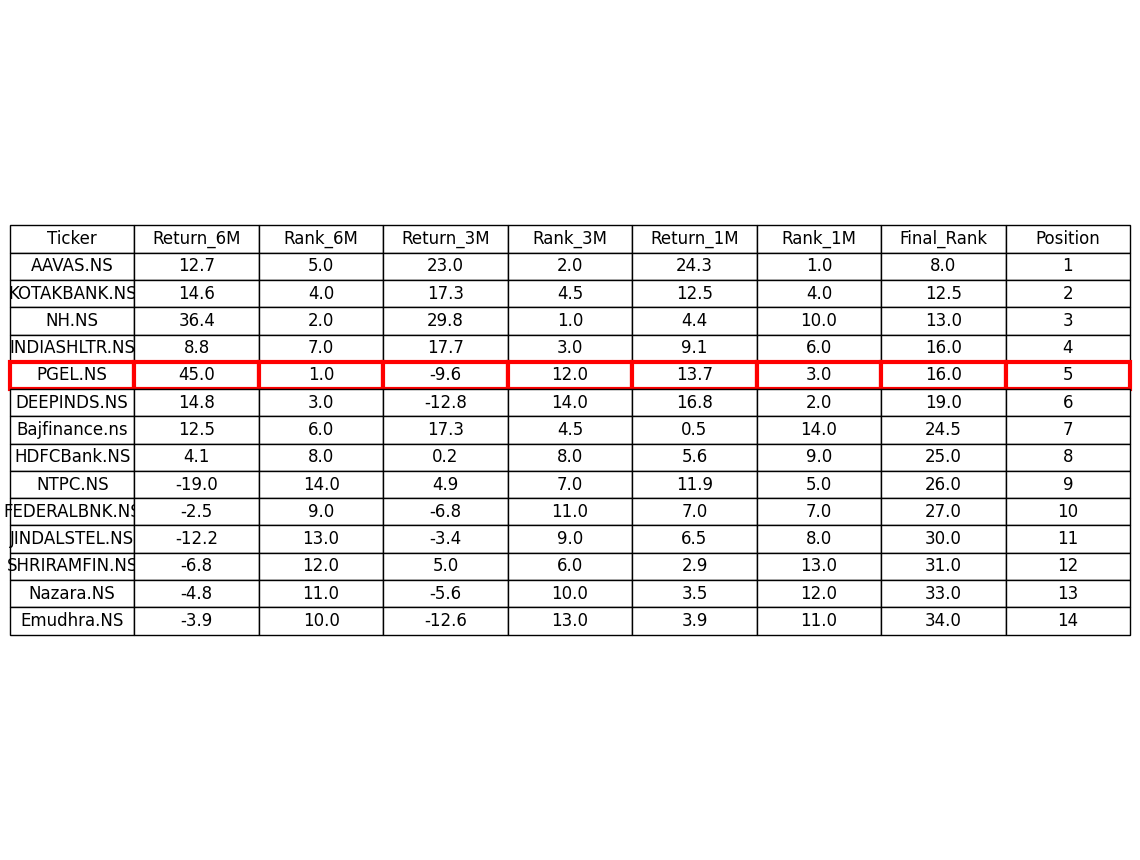

In [ ]:



# Convert summary to DataFrame
df_summary = pd.DataFrame(summary)

# Round off returns to 1 decimal place
df_summary['Return_6M'] = df_summary['Return_6M'].round(1)
df_summary['Return_3M'] = df_summary['Return_3M'].round(1)
df_summary['Return_1M'] = df_summary['Return_1M'].round(1)

# Ranking based on returns
df_summary['Rank_6M'] = df_summary['Return_6M'].rank(ascending=False)
df_summary['Rank_3M'] = df_summary['Return_3M'].rank(ascending=False)
df_summary['Rank_1M'] = df_summary['Return_1M'].rank(ascending=False)

# Calculate final rank
df_summary['Final_Rank'] = df_summary['Rank_6M'] + df_summary['Rank_3M'] + df_summary['Rank_1M']

# Sort by final rank and get top 30
df_summary_sorted = df_summary.sort_values('Final_Rank').head(40)

# Assign position based on final rank
df_summary_sorted['Position'] = np.arange(1, len(df_summary_sorted) + 1)

# Separate top 15 and next 15
top_15 = df_summary_sorted.head(15)
next_15 = df_summary_sorted.iloc[15:30]

# Prepare table data
tbl_data = []
for i, row in df_summary_sorted.iterrows():
    tbl_data.append([row['Ticker'],
                     row['Return_6M'], row['Rank_6M'],
                     row['Return_3M'], row['Rank_3M'],
                     row['Return_1M'], row['Rank_1M'],
                     row['Final_Rank'], row['Position']])

# Plot the results using matplotlib
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')

# Create a table
col_labels = ['Ticker', 'Return_6M', 'Rank_6M', 'Return_3M', 'Rank_3M', 'Return_1M', 'Rank_1M', 'Final_Rank','Position']
table = ax.table(cellText=tbl_data, colLabels=col_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Draw a red line to separate the top 15
for i in range(len(col_labels)):
    cell = table[(5, i)]
    cell.set_edgecolor('red')
    cell.set_linewidth(3)

# Adjust layout
plt.subplots_adjust(left=0.1, top=0.95)  # Adjust top parameter for title position
#plt.title('Top 40 Stocks Momentum Ranking', fontsize=18, y=1.05)  # y parameter for title position
plt.show()

In [ ]:
def get_nifty50_symbols():
    # This is a simplified list. In practice, you might want to fetch this dynamically.
    return [
  #      'ABB.NS', 'ACC.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'ADANIENSOL.NS', 'ADANIENT.NS',
        'KPITTECH.NS', 'METROBRAND.NS', 'PERSISTENT.NS', 'ANGELONE.NS', 'RAINBOW.NS',
'MASFIN.NS', 'Bajfinance.ns', 'EIDPARRY.NS', 'SAFARI.NS', 'IDFCFIRSTB.NS', 'ZOMATO.NS',
'SONACOMS.NS', 'CHOLAFIN.NS', 'SULA>NS', 'FEDERALBNK.NS', 'CMSINFO.NS', 'HOMEFIRST.NS',
'TIPS.NS', 'KEI.NS', 'RAYMONDLSL.NS', 'AAVAS.NS', 'MEDANTA.NS', 'APTUS.NS', 'SHRIRAMFIN.NS',
'POLYMED.NS', 'NH.NS', 'BLS.NS', 'BIKAJI.NS', 'KIRLOSENG.NS', 'MANKIND.NS', 'BSOFT.NS',
'PNGJL.NS', 'JINDALSTEL.NS', 'REDTAPE.NS', 'Dabur.NS', 'ARVINDFASN.NS',
'METROPOLIS.NS', 'FEDFINA.NS', 'Nykaa.NS', 'SJS.NS', 'Cyient.NS', 'AADHARHFC.NS',
'Nazara.NS', 'DEEPINDS.NS', 'THOMASCOOK.NS', 'BAJAJHFL.NS', 'NAUKRI.NS', 'TI.NS',
'DMART.NS', 'VIJAYA.NS', 'Deltacorp.NS', 'VBL.NS', 'PROTEAN.NS', 'CAMS.NS', 'Fusion.NS',
'Prudent.NS', 'INDIASHLTR.NS', 'Emudhra.NS', 'PGEL.NS', 'KOTAKBANK.NS', 'STARHEALTH.NS',
'NLCINDIA.NS', 'RAYMOND.NS', 'ARVIND.NS', 'MEDIASSIST.NS', 'BATAINDIA.NS', 'polycab.NS',
'KPRMILL.NS', 'HEROMOTOCO.NS', 'RELIANCE.NS', 'ARE&M.NS', 'HDFCBank.NS', 'KFINTECH.NS',
'TataMotors.NS', 'NTPC.NS', 'ONGC.NS', 'SJVN.NS', 'NHPC.NS', 'CENTURYPLY.NS', 'ABCAPITAL.NS',
'JIOFIN.NS', 'LALPATHLAB.NS', 'INDUSINDBK.NS', 'HCLTECH.NS', 'TATAELXSI.NS', 'LTIM.NS',
'IDEAFORGE.NS', 'HDFCAMC.NS', 'BAYERCROP.NS', 'JBMA.NS', 'OLECTRA.NS', 'DrReddy.NS',
'Plazacable.NS', 'ABFRL.NS', 'WAAREEENR.NS']

In [ ]:
def calculate_metrics(symbol):
    stock = yf.Ticker(symbol)

    try:
        info = stock.info
        financials = stock.financials

        if 'marketCap' not in info:
            raise KeyError("Market Cap data not available")

        market_cap = info['marketCap']

        # Fetch historical data for the last year and 100 days
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)
        hist_data = stock.history(start=start_date, end=end_date)

        # Earnings Yield
        earnings = financials.loc['Net Income'].iloc[0] if 'Net Income' in financials.index else 0
        earnings_yield = (earnings / market_cap) * 100 if market_cap else 0

        # Dividend Yield
        dividend_yield = info.get('dividendYield', 0) * 100

        # 1-Year Volatility
        returns = hist_data['Close'].pct_change().dropna()
        volatility = returns.std() * np.sqrt(252) * 100  # Annualized volatility in percentage

        # 100-day EMA
        ema_100 = hist_data['Close'].ewm(span=100, adjust=False).mean().iloc[-1]
        current_price = hist_data['Close'].iloc[-1]

        # 1-year return
        one_year_return = (current_price / hist_data['Close'].iloc[0] - 1) * 100

        # 52-week high
        fifty_two_week_high = hist_data['Close'].max()

        # Check momentum criteria
        above_ema = current_price > ema_100
        sufficient_return = one_year_return >= 6.5
        near_high = current_price >= 0.75 * fifty_two_week_high

        meets_criteria = above_ema and sufficient_return and near_high

        return {
            'Symbol': symbol,
            'Earnings Yield (%)': earnings_yield,
            'Dividend Yield (%)': dividend_yield,
            'Volatility (%)': volatility,
            'Above 100-day EMA': above_ema,
            '1-Year Return (%)': one_year_return,
            'Within 25% of 52-week High': near_high,
            'Meets All Criteria': meets_criteria
        }
    except Exception as e:
        print(f"Error processing {symbol}: {str(e)}")
        return None



In [ ]:
def main():
    nifty_symbols = get_nifty50_symbols()
    results = []

    for symbol in nifty_symbols:
        result = calculate_metrics(symbol)
        if result:
            results.append(result)

    if not results:
        print("No valid data found for any symbols.")
        return

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Filter stocks that meet all criteria
    df_filtered = df[df['Meets All Criteria']]

    if df_filtered.empty:
        print("No stocks meet all the momentum criteria.")
        return

    metric_columns = ['Earnings Yield (%)', 'Dividend Yield (%)', 'Volatility (%)']

    # Calculate ranks for each metric
    df_filtered['Earnings Yield Rank'] = df_filtered['Earnings Yield (%)'].rank(ascending=False, method='min')
    df_filtered['Dividend Yield Rank'] = df_filtered['Dividend Yield (%)'].rank(ascending=False, method='min')
    df_filtered['Volatility Rank'] = df_filtered['Volatility (%)'].rank(ascending=True, method='min')  # Lower volatility is better

    # Calculate weighted average rank
    df_filtered['Weighted Rank'] = (
        0.25 * df_filtered['Earnings Yield Rank'] +
        0.25 * df_filtered['Dividend Yield Rank'] +
        0.50 * df_filtered['Volatility Rank']
    )

    # Calculate final rank based on weighted average rank
    df_filtered['Final Rank'] = df_filtered['Weighted Rank'].rank(method='min')

    # Sort by Final Rank
    df_filtered = df_filtered.sort_values('Final Rank')

    # Select columns to display
    display_columns = ['Symbol', 'Final Rank', 'Weighted Rank', 'Earnings Yield Rank', 'Dividend Yield Rank', 'Volatility Rank'] + \
                      metric_columns + ['1-Year Return (%)', 'Above 100-day EMA', 'Within 25% of 52-week High']

    # Display the results
    pd.set_option('display.float_format', '{:.2f}'.format)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    print(df_filtered[display_columns].to_string(index=False))

if __name__ == "__main__":
    main()

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SULA%3ENS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SULA%3ENS&crumb=sWQFvz%2FKV3J


Error processing SULA>NS: 'NoneType' object has no attribute 'update'
Error processing TIPS.NS: 'Market Cap data not available'
Error processing WAAREEENR.NS: 'Market Cap data not available'
       Symbol  Final Rank  Weighted Rank  Earnings Yield Rank  Dividend Yield Rank  Volatility Rank  Earnings Yield (%)  Dividend Yield (%)  Volatility (%)  1-Year Return (%)  Above 100-day EMA  Within 25% of 52-week High
  HDFCBank.NS        1.00           2.75                 5.00                 4.00             1.00                4.60              107.00           20.62              21.86               True                        True
FEDERALBNK.NS        2.00           3.75                 1.00                 6.00             4.00                8.22               62.00           27.09              27.06               True                        True
 KOTAKBANK.NS        3.00           5.25                 7.00                10.00             2.00                4.27                9.00    

<ipython-input-22-407ca359d619>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Earnings Yield Rank'] = df_filtered['Earnings Yield (%)'].rank(ascending=False, method='min')
<ipython-input-22-407ca359d619>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Dividend Yield Rank'] = df_filtered['Dividend Yield (%)'].rank(ascending=False, method='min')
<ipython-input-22-407ca359d619>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us